<a href="https://colab.research.google.com/github/gabosantos/2324CS280UPD/blob/main/CS_280_Lesson_2_Linear_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview


In this lesson you will learn:
*   What is a linear classifier
*   How to fit a linear classifier
*   How to prevent overfitting with cross-validation

# Concepts

Previously, we discussed the different ML approaches (supervised, unsupervised, reinforcement). In this lesson, we will focus on <font color="#9980FA">supervised machine learning</font>, which centers around using labeled data. Within this framework, we distinguish between two key types: classification and regression. Classification tasks involve categorizing data into predefined classes, while regression tasks try to predict continuous, numerical values.

## Linear Classifier

Today, we will discuss <font color="#9980FA">linear classifiers</font>, which are known for their simplicity and effectiveness and are fundamental in machine learning. Linear classifiers categorize samples into discrete classes based on a linear combination of their features. Examples of linear classifiers include models such as Logistic Regression, Support Vector Machines (SVMs), and Perceptrons.

Check this list of [Scikit-learn Linear Models](https://scikit-learn.org/stable/modules/linear_model.html) (including regression).

<font color="#9980FA">Logistic regression</font> is considered one of the most basic linear classifiers. The core of logistic regression lies in its logistic or sigmoid function, which transforms any real-valued number into a value between 0 and 1. The equation for logistic regression is:

<br>
\begin{equation}
P(y=1) = \frac{1}{1 + e^{-Z}}
\end{equation}

<br>

Here, $P(y=1)$ represents the probability of the event occurring, $e$ is the natural logarithm, and $Z$ is a linear combination of input features and their corresponding weights ($Z=a+bX$, where $X$ are the input features, $a$ is the bias and $b$ are the weights).

This equation calculates the probability of a data point belonging to class 1. By adjusting the weights through training, the model learns to find the best-fitting decision boundary that separates the classes effectively.

<br>

<table width="100%"><tr><td align="center" bgcolor="black"><img src="https://drive.google.com/uc?export=view&id=1Y-cOUscXpqV1UKgKw6eZIXB0T4mwQX57" height="360"/></td></tr></table>
<center><small>u/RacerRex9727</small></center>

## Gradient Descent

When fitting the logistic regression model, we use an optimization algorithm such as <font color="#9980FA">gradient descent</font> to adjust the model's parameters iteratively to minimize a loss/error function. In the case of logistic regression, the loss function is typically the logistic loss (aka cross-entropy loss or log loss), which quantifies the dissimilarity between the predicted probabilities and the actual class labels [GDML]:

<br>

\begin{equation}
\text{L}(\Theta) = \frac{1}{m} \sum_{(x,y)\in D} -y\log(\widehat y) - (1 - y)\log(1 - \widehat y)
\end{equation}

<br>

where:
* $\text{L}$ is log loss function.
* $\Theta$ is the model parameters.
* $(x,y)\in D$ is the data set containing many labeled examples, which $(x,y)$ are pairs.
* $y$ is the label in a labeled example. Since this is logistic regression, every value of $y$ must either be 0 or 1.
* $\widehat y$ is the predicted value (somewhere between 0 and 1), given the set of features in $x$.
* $m$ is the number of training samples.


<br>


The primary objective is to find the parameter values that yield the lowest loss, effectively aligning the model's predictions with the ground truth. Gradient descent helps logistic regression converge towards the best-fitting decision boundary that separates the two classes.

To control the gradient descent, we can use the <font color="#9980FA">learning rate</font> parameter. It influences the speed of convergence, with a high learning rate risking overshooting the minimum, and a low learning rate causing slow convergence. Finding the right learning rate is usually by trial and error. Nevertheless, it is essential for effective model training and optimization.

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1XjPTqHzobYrGtF8wH2tQZDvGuLIDfx-l" height="360"/></td></tr></table>
<center><small>Saxena @ heartbeat.comet.ml</small></center>


In machine learning modeling, there's another significant concept to consider, known as <font color="#9980FA">regularization</font>. We will discuss more about this topic in the upcoming lesson. For now, it's essential to understand that regularization plays a crucial role in preventing the model from overfitting the data.

## Cross-validation

Speaking of overfitting, another valuable technique at our disposal is <font color="#9980FA">cross-validation</font>. Overfitting occurs when a machine learning model learns the training data too well, capturing noise rather than general patterns. This can lead to poor generalization of unseen data, making the model less effective in real-world applications.

Instead of relying solely on a single train-test split, cross-validation involves partitioning the dataset into multiple subsets (often called <font color="#9980FA">folds</font>). The model is trained and evaluated multiple times, with each fold serving as the test set once and the remaining data as the training set. Cross-validation is particularly practical for smaller datasets, where each data point carries significant weight.

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1TisJURC3SZbGyKYn4ubwH2sUMYRhj3Dg" height="360"/></td></tr></table>
<center><small>Scikit-learn</small></center>



# Codes
Let's take a look at how we can model linear classifiers. For this demonstration, we'll use the <font color="#9980FA">`MNIST database of handwritten digits`</font>, which includes handwritten images of single digits (0-9). Our aim is to create a supervised ML model that can classify the digit written on an image.

## Load the data set

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')
print("Data set info:")
mnist.keys()

Data set info:


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
import numpy as np
import pandas as pd

X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

print("Samples:", X.shape[0])
f = int(np.sqrt(X.shape[1]))
print("Features:", f, "x", f)
print("Classes:", np.unique(y))

Samples: 70000
Features: 28 x 28
Classes: [0 1 2 3 4 5 6 7 8 9]


## Explore the data

Let's take a look at the sample images.

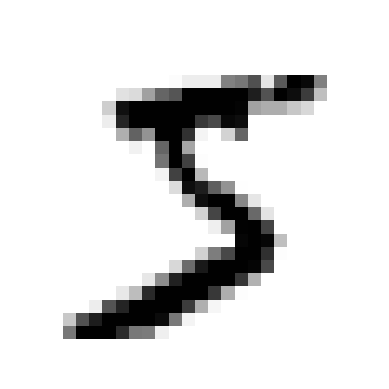


Target: 5


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

i = 0
some_digit = X.iloc[i].to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print("\nTarget:", y[i])

In [ ]:
X = X.to_numpy()
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

## Fit the linear model

Scikit-learn provides several linear classifier models. For this demo, we will use <font color="#9980FA">`LogisticRegression`</font>.

For this demo, we will try to solve a binary classification. Here, our model will try to determine whether a digit is a 5 (five) or not a 5 (not five).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('scaler', StandardScaler()),
                 ('logistic', LogisticRegression(solver='saga', random_state=42))]) # try increasing max_iter for convergence

y_train_5 = (y_train == 5).to_numpy() # True for all 5s, False for all other digits
y_test_5 = (y_test == 5).to_numpy()

pipe.fit(X_train, y_train_5);

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


If you come across a <font color="#9980FA">`ConvergenceWarning`</font> while training your classifier, like Logistic Regression, here are some things you could try:

1. Increase the maximum number of iterations (<font color="#9980FA">`max_iter`</font>)
2. Normalize/standardize features (<font color="#9980FA">`StandardScaler`</font>)
3. Adjust regularization strength (<font color="#9980FA">`C`</font>)

For demonstration purposes, we'll leave the default <font color="#9980FA">`max_iter`</font> value.

Let's see how good our model can predict test data.

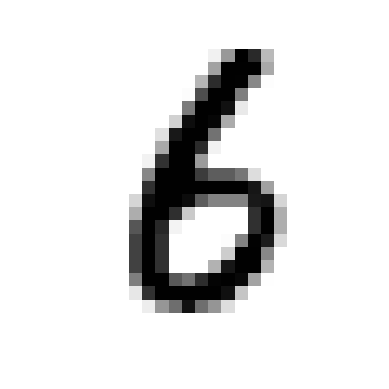


Digit IS NOT a 5.


In [ ]:
import random
# random.seed(42)

i = random.randint(0, len(y_test_5))

some_digit = X_test[i]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

y_pred = pipe.predict([some_digit])
print("\nDigit IS a 5." if y_pred else "\nDigit IS NOT a 5.")

## Evaluate the model

To evaluate the performance of our model, we can use several performance metrics. Here's a [list](https://scikit-learn.org/stable/modules/model_evaluation.html) of
Scikit-learn scoring metrics.

For classification problem, we typically use these four metrics:

* <font color="#9980FA">`accuracy`</font>: Accuracy measures the proportion of correctly predicted instances out of the total instances. It provides an overall assessment of a model's correctness.

* <font color="#9980FA">`precision`</font>: Precision measures the accuracy of positive predictions, indicating the proportion of true positives among all predicted positives. It's useful for minimizing false positives is crucial.

* <font color="#9980FA">`recall`</font>: Recall measures the model's ability to find all positive instances, representing the proportion of true positives among all actual positives. It's useful for minimizing false negatives.

* <font color="#9980FA">`f-score`</font>: The F-Score is a harmonic mean of precision and recall, balancing the trade-off between the two metrics. It provides a single measure that considers both precision and recall, making it useful when achieving a balance between false positives and false negatives is essential.

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1ApCYcEyipvpYQ7B9oKq1w-3k3mh9_cKC" height="360"/></td></tr></table>
<center><small>HML</small></center>


In [ ]:
from sklearn.metrics import classification_report

base_model = pipe
y_pred = base_model.predict(X_test)
y_true = y_test_5

print(classification_report(y_true, y_pred, labels=[True, False], target_names=['Five', 'Not Five']))

              precision    recall  f1-score   support

        Five       0.91      0.78      0.84       892
    Not Five       0.98      0.99      0.99      9108

    accuracy                           0.97     10000
   macro avg       0.95      0.89      0.91     10000
weighted avg       0.97      0.97      0.97     10000



Notice how our model has very high performance across all metrics except <font color="#9980FA">`recall`</font> for class <font color="#9980FA">`Five`</font>. This is because there are only 892 samples of the digit 5 in the test set, which is ~9% of the entire test set.

In fact, if we let our model predict <font color="#9980FA">`Not Five`</font> all the time, it will still have ~90% accuracy!

This shows the importance of using different metrics to see how well our model truly performs.

## Optimize hyperparameter

Lastly, let's try to use cross-validation to find the best value for the regularization parameter <font color="#9980FA">`C`</font>. Here we will try 3 different values: 0.1, 1, and 10.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'logistic__C':[0.1, 0.5, 1, 2, 10]}

scoring = 'recall'

# Note: this pipeline may not be efficient as it runs the scaler several times
# It might be better to scale outside the cv loop
cv_pipe = Pipeline([('scaler', StandardScaler()),
                    ('logistic', LogisticRegression(solver='saga', random_state=42))])

gridsearch = GridSearchCV(cv_pipe, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, scoring=scoring)
gridsearch.fit(X_train, y_train_5);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................logistic__C=0.1; total time=  50.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................logistic__C=0.1; total time=  49.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................logistic__C=0.1; total time= 1.0min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................logistic__C=0.5; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................logistic__C=0.5; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................................logistic__C=0.5; total time= 1.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................................logistic__C=1; total time=  52.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................................logistic__C=1; total time=  51.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................................logistic__C=1; total time=  50.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................................logistic__C=2; total time=  50.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................................logistic__C=2; total time=  50.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................................logistic__C=2; total time=  50.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................................logistic__C=10; total time=  50.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................................logistic__C=10; total time=  50.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................................logistic__C=10; total time=  50.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print("\nBest model:", gridsearch.best_estimator_)
print("Optimized parameter:", gridsearch.best_params_)
print("Score (%s): %.4f" % (scoring, gridsearch.best_score_))


Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.5, random_state=42, solver='saga'))])
Optimized parameter: {'logistic__C': 0.5}
Score (recall): 0.7596


## Compare models

In [ ]:
cv_model = gridsearch # if refit=True; o.w. retrain model

y_true = y_test_5
y_pred = base_model.predict(X_test)
y_pred_cv = cv_model.predict(X_test)

print("Base model")
print(classification_report(y_true, y_pred, labels=[True, False], target_names=['Five', 'Not Five']))

print("CV model")
print(classification_report(y_true, y_pred_cv, labels=[True, False], target_names=['Five', 'Not Five']))

Base model
              precision    recall  f1-score   support

        Five       0.91      0.78      0.84       892
    Not Five       0.98      0.99      0.99      9108

    accuracy                           0.97     10000
   macro avg       0.95      0.89      0.91     10000
weighted avg       0.97      0.97      0.97     10000

CV model
              precision    recall  f1-score   support

        Five       0.91      0.78      0.84       892
    Not Five       0.98      0.99      0.99      9108

    accuracy                           0.97     10000
   macro avg       0.95      0.89      0.91     10000
weighted avg       0.97      0.97      0.97     10000



It seems that hyperparameter optimization via cross-validation does not improve the classifier's performance. This could be due to the reduced maximum iterations, limited parameter values for searching, or the number of folds (k). In general, it is still best practice to perform cross-validation.

# Challenges

For your challenge, you will extend the linear classification to all 10 different digits. Check out [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on how to do this.

## Multiclass classification

In [ ]:
# --------------------------------------------
# TODO: INSERT CODE HERE
# --------------------------------------------

# References

[AIMA] Russell and Norvig, *Artificial Intelligence: A Modern Approach*, 4th ed, 2020

[HML] Géron, *Hands-on Machine Learning with Scikit-Learn*, Keras, and TensorFlow, 2017

[PRML] Bishop, *Pattern Recognition and Machine Learning*, 2006

[GDML] Google Developers Machine Learning Course [[link](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training)]